This combines two employee exit survey datasets from the Department of Education and Technical and Further Education Institute. The following are questions that will be answered from the data:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
print(dete_survey.info())
print(dete_survey.head(5))
print()
print(tafe_survey.info())
print(tafe_survey.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

There are many missing values that needs to be cleaned. There is also more columns than we need in both datasets so we will be removing the columns that are not nessasary factors for answering the project's questions.

In [3]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [4]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip()\
.str.replace(' ','_')

In [5]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

`tafe_survey_updated` has some messy colomn names even after removing unessasary values. The bellow cell changes the columns relavant to this analysis to a shortened snake_case name. The following cell prints the updated column names. 

In [6]:
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace('CESSATION YEAR',\
'cease_date').str.replace('Reason for ceasing employment', 'separationtype')\
.str.replace('Gender. What is your Gender', 'gender').str.replace\
('Currentage. Current Age', 'age').str.replace('Employment Type. Employment Type',\
'employment_status').str.replace('Classification. Classification', 'position')\
.str.replace('(', '').str.replace(')', '')\
.str.replace('LengthofServiceOverall. Overall Length of Service at Institute (in years)',\
'institute_service').str.replace('LengthofServiceCurrent. Length of Service at current workplace (in years)',\
'role_service')

In [7]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender?',
       'CurrentAge. Current Age', 'employment_status', 'position',
       'institute_service', 'role_service'],
      dtype='object')

Since the goal is to find relationships between resignations and dissatisfaction, only rows containing resignation as the reason for stopping work will be isolated. `series.valuecounts` is used to find all possible reasons for stopping work. The `str.countains` method uses a boolean operator to put only data for those who resigned into a new dataset, `dete_resignations` and `tafe_resignations` respectively.

In [8]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [9]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [10]:
dete_resignations = dete_survey_updated[dete_survey_updated.separationtype.str.contains('Resignation')].copy()


In [11]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated.separationtype == 'Resignation'].copy()

Now that the data has just the category we are interested (those who resigned), the colomns with dates will be checked for errors. 

In [12]:
dete_resignations.cease_date.unique()

array(['05/2012', '07/2012', '2012', '2013', '2010', '07/2013', '06/2013',
       '09/2013', '09/2010', '01/2014', '05/2013', '08/2013', '10/2013',
       '12/2013', '11/2013', nan, '07/2006'], dtype=object)

In [13]:
tafe_resignations.cease_date.unique()

array([2010., 2009.,   nan, 2011., 2012., 2013.])

In [14]:
dete_resignations['cease_date'] = dete_resignations.cease_date.str.split('/').str[-1].astype(float)

In [15]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

The dates columns for our different datasets are very scattered but since we're not evaluting a time dependant research question, they will be okay to use together. There is no outliers and so the data makes sense. Now all the dates are refined by years and as the float type. 

Next we make those dates columns uniform. This is measured by the time of service. `tafe_resignations` already has this in the `institute_service` column but `dete_resignations` doesn't have a time employed column. The next cell makes a `institute_service` column for `dete_resignations` by subtracting the start and end dates for each row. 

In [16]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

Next, columns related to dissatisfaction with the job will be isolated. Columns with something related to disatisfaction have either "-" or the reason for dissatisfaction. The `update_vals` function is made to return true or false if the "-" or reasond description is present. The result is a new column that provides True, False, or NaN depending on weather each row job loss resulted from dissatisfaction. 

In [17]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

In [18]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [19]:
def update_vals(value):
    if value == '-':
        return False
    elif pd.isnull(value):
        return np.nan
    else:
        return True

In [20]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',\
'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition',\
'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance',\
'workload']].any(1, skipna=False)
# The any function returns true if any values in the preceding list meet the criteria

tafe_resignations['dissatisfied'] = tafe_resignations\
[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]\
.applymap(update_vals).any(1, skipna=False)

In [21]:
dete_resignations_up = dete_resignations.copy()

tafe_resignations_up = tafe_resignations.copy()

print(dete_resignations_up['dissatisfied'].value_counts(dropna=False))
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [22]:
# making a column that tells us the original dataframe
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [23]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)
combined_updated = combined.dropna(axis=1, thresh=500)

In [24]:
combined_updated

,cease_date,dissatisfied,employment_status,institute,institute_service,position,separationtype
3,2012.0,False,Permanent Full-time,DETE,7,Teacher,Resignation-Other reasons
5,2012.0,True,Permanent Full-time,DETE,18,Guidance Officer,Resignation-Other reasons
8,2012.0,False,Permanent Full-time,DETE,3,Teacher,Resignation-Other reasons
9,2012.0,True,Permanent Part-time,DETE,15,Teacher Aide,Resignation-Other employer
11,2012.0,False,Permanent Full-time,DETE,3,Teacher,Resignation-Move overseas/interstate
12,2012.0,False,Permanent Full-time,DETE,14,Teacher,Resignation-Other reasons
14,2012.0,True,Permanent Full-time,DETE,5,Teacher,Resignation-Other employer
16,2012.0,True,Permanent Part-time,DETE,NaN,Teacher Aide,Resignation-Other reasons
20,2012.0,False,Permanent Full-time,DETE,30,Teacher,Resignation-Other employer
21,2012.0,False,Permanent Part-time,DETE,32,Cleaner,Resignation-Other reasons


Now that there is a dissatisfied column to compare to the length of service, the `institute_service` column needs cleaning for both datasets. The below cells convert the column to numbers as floats. Then, based on the number of years, a new column (`service_category`) is made to represent four experience categories. 

In [25]:
combined_updated['institute_service'].astype('str')

3                   7.0
5                  18.0
8                   3.0
9                  15.0
11                  3.0
12                 14.0
14                  5.0
16                  nan
20                 30.0
21                 32.0
22                 15.0
23                 39.0
25                 17.0
27                  7.0
33                  9.0
34                  6.0
37                  1.0
39                  nan
40                 35.0
41                 38.0
42                  1.0
43                 36.0
48                  3.0
50                  3.0
51                 19.0
55                  4.0
57                  9.0
61                  1.0
69                  6.0
71                  1.0
             ...       
659                 1-2
660                 3-4
661                 5-6
665                 nan
666                 nan
669                 3-4
670                 nan
671    Less than 1 year
675    Less than 1 year
676                 1-2
677    Less than

In [26]:
combined_updated['institute_service_up'] = combined_updated['institute_service']\
.astype('str').str.extract(r'(\d+)')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
combined_updated['institute_service_up'] = combined_updated['institute_service_up']\
.astype('float')
combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [28]:
def categorize(val):
    if pd.isnull(val):
        return np.nan
    elif val <= 3:
        return 'New'
    elif 3 < val <= 6:
        return 'Established'
    elif 6 < val <=10:
        return 'Experienced'
    elif 10 < val <= 20:
        return 'TenYear'
    elif val > 20:
        return 'veteran'

In [29]:
combined_updated['service_category'] = combined_updated['institute_service_up'].apply(categorize)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
combined_updated['service_category']

3      Experienced
5          TenYear
8              New
9          TenYear
11             New
12         TenYear
14     Established
16             NaN
20         veteran
21         veteran
22         TenYear
23         veteran
25         TenYear
27     Experienced
33     Experienced
34     Established
37             New
39             NaN
40         veteran
41         veteran
42             New
43         veteran
48             New
50             New
51         TenYear
55     Established
57     Experienced
61             New
69     Established
71             New
          ...     
659            New
660            New
661    Established
665            NaN
666            NaN
669            New
670            NaN
671            New
675            New
676            New
677            New
678            New
679            New
681            New
682            New
683            New
684            New
685            New
686    Established
688    Established
689            New
690         

Below we make a pivot table comparing the percent dissatisfied and categorize based on years experience. Results are represented graphically. 

In [31]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [32]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [34]:
ratio_dissatisfied = combined_updated.pivot_table(values='dissatisfied', index = 'service_category')
ratio_dissatisfied = ratio_dissatisfied['dissatisfied'].sort_values()
ratio_dissatisfied

service_category
New            0.289855
Established    0.404494
TenYear        0.430108
Experienced    0.516129
veteran        0.604651
Name: dissatisfied, dtype: float64

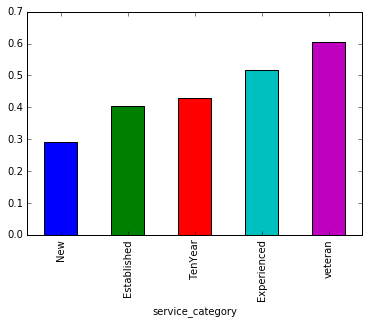

In [35]:
%matplotlib inline
ratio_dissatisfied.plot(kind='bar')

The results for this graph clearly indicate that rates of dissatisfaction increase with the years of service. Since this uses multiple datasets from different contries the results show even a strong relationship cross-culturally. 